In [22]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [23]:
data = pd.read_csv('text_emotion.csv')
train = data.drop(['tweet_id','author'], axis = 1) 

In [24]:
train.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [25]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

## Preprocessing Tweets

In [26]:
train['tidy_tweet'] = np.vectorize(remove_pattern)(train['content'], "@[\w]*")
train['tidy_tweet'] = train['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
train['tidy_tweet'] = train['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [27]:
train.head()

,sentiment,content,tidy_tweet
0,empty,@tiffanylue i know i was listenin to bad habi...,know listenin habit earlier started freakin part
1,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin with headache ughhhh waitin your call
2,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony gloomy friday
3,enthusiasm,wants to hang out with friends SOON!,wants hang with friends SOON
4,neutral,@dannycastillo We want to trade with someone w...,want trade with someone Houston tickets will


## Tokenization and stemming

In [28]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [29]:
tokenized_tweet = train['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [know, listenin, habit, earlier, started, frea...
1    [Layin, with, headache, ughhhh, waitin, your, ...
2                  [Funeral, ceremony, gloomy, friday]
3                   [wants, hang, with, friends, SOON]
4    [want, trade, with, someone, Houston, tickets,...
Name: tidy_tweet, dtype: object

In [30]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [know, listenin, habit, earlier, start, freaki...
1    [layin, with, headach, ughhhh, waitin, your, c...
2                    [funer, ceremoni, gloomi, friday]
3                     [want, hang, with, friend, soon]
4    [want, trade, with, someon, houston, ticket, w...
Name: tidy_tweet, dtype: object

In [31]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

train['tidy_tweet'] = tokenized_tweet

In [32]:
train.head()

,sentiment,content,tidy_tweet
0,empty,@tiffanylue i know i was listenin to bad habi...,know listenin habit earlier start freakin part
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin with headach ughhhh waitin your call
2,sadness,Funeral ceremony...gloomy friday...,funer ceremoni gloomi friday
3,enthusiasm,wants to hang out with friends SOON!,want hang with friend soon
4,neutral,@dannycastillo We want to trade with someone w...,want trade with someon houston ticket will


# Understanding the common words used in the tweets: WordCloud

## All Tweets

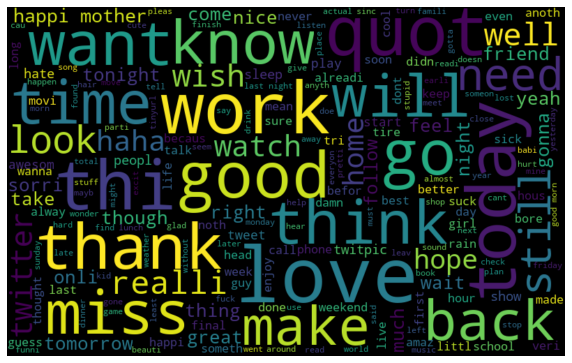

In [33]:
all_words = ' '.join([text for text in train['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Happy Tweets

normal_words =' '.join([text for text in train['tidy_tweet'][train['sentiment'] == 'happiness']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Hate Tweets

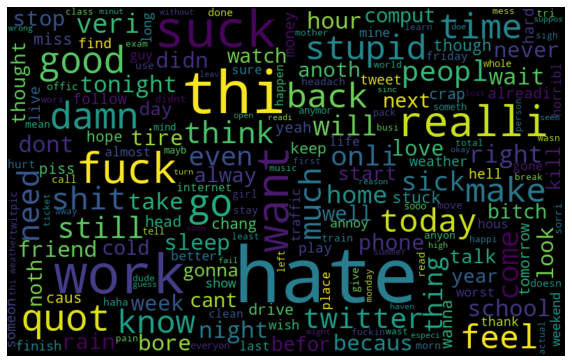

In [35]:
normal_words =' '.join([text for text in train['tidy_tweet'][train['sentiment'] == 'hate']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Anger Tweets

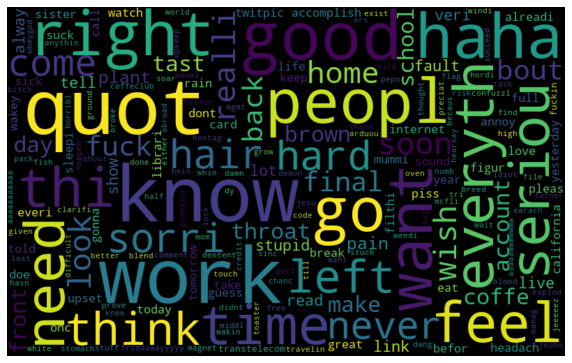

In [36]:
normal_words =' '.join([text for text in train['tidy_tweet'][train['sentiment'] == 'anger']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Sadness Tweets

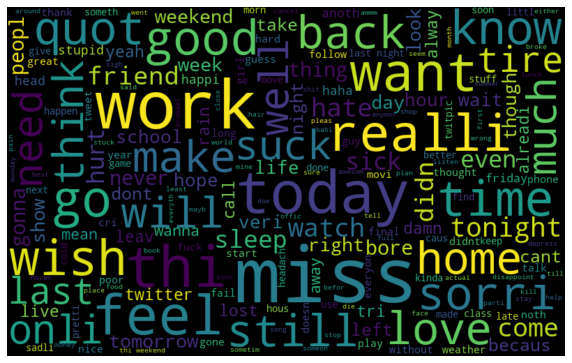

In [37]:
normal_words =' '.join([text for text in train['tidy_tweet'][train['sentiment'] == 'sadness']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()